In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amazon-fine-food-reviews/hashes.txt
/kaggle/input/amazon-fine-food-reviews/Reviews.csv
/kaggle/input/amazon-fine-food-reviews/database.sqlite


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
import nltk # natural language toolkit

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
# Read in data
df = pd.read_csv('/kaggle/input/amazon-fine-food-reviews/Reviews.csv')

In [4]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


We would be running the sentiment analysis on the 'Text' column from the data.

In [5]:
# scaling down the dataset
df1 = df.head(400)
df1.shape

(400, 10)

EDA for understanding the data quickly.

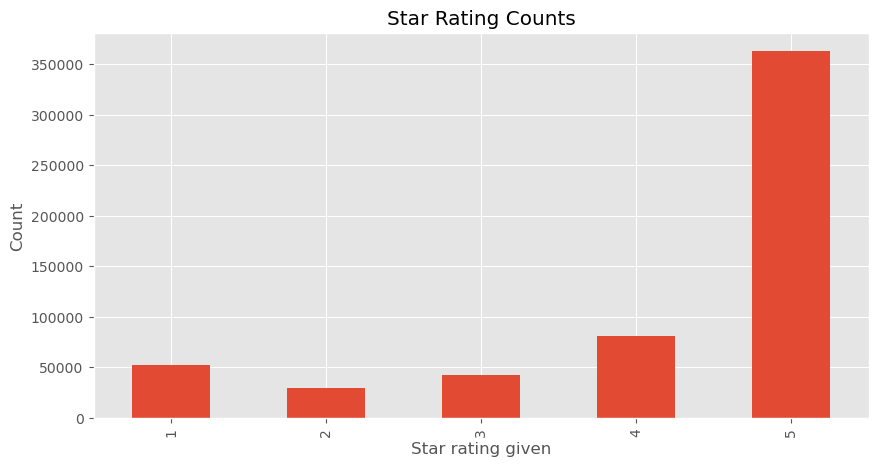

In [6]:
# see the freq distribution of the scores
bar1 = df['Score'].value_counts().sort_index().plot(kind =
         'bar', title = 'Star Rating Counts'
        ,figsize = (10, 5))
bar1.set_xlabel('Star rating given')
bar1.set_ylabel('Count')
plt.show()

**Basic NLTK**

NLTK Can

tokenize the sentence so that the computer understands the language



In [7]:
example = "I can't say that i do like this"
tokens = nltk.word_tokenize(example) # splits the sentence.(not exaclty into the individual words)
tokens

['I', 'ca', "n't", 'say', 'that', 'i', 'do', 'like', 'this']

In [8]:
# attach the speech tags to the words.
tagged = nltk.pos_tag(tokens)
tagged

[('I', 'PRP'),
 ('ca', 'MD'),
 ("n't", 'RB'),
 ('say', 'VB'),
 ('that', 'IN'),
 ('i', 'JJ'),
 ('do', 'VBP'),
 ('like', 'IN'),
 ('this', 'DT')]

In [9]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint

<bound method Tree.pprint of Tree('S', [('I', 'PRP'), ('ca', 'MD'), ("n't", 'RB'), ('say', 'VB'), ('that', 'IN'), ('i', 'JJ'), ('do', 'VBP'), ('like', 'IN'), ('this', 'DT')])>

# **Sentiment Analysis using VADER**

# In this, each word would be given a score. The summation of word scores in a sentence will decide if a sentennce has a total sentiment of neg, neutral or positive.

 # In vader, the connections between the words are not considered. It just individually gives scores to each words and sum it up.

# Vader can not capture the cotext due to this structure.

In [10]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

# sentiment intensity analyzer(sia)

sia = SentimentIntensityAnalyzer()

/opt/conda/lib/python3.10/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [11]:
sia.polarity_scores(example)

{'neg': 0.0, 'neu': 0.667, 'pos': 0.333, 'compound': 0.3612}

In [12]:
sia.polarity_scores('I hated this thing like anything')

{'neg': 0.433, 'neu': 0.309, 'pos': 0.258, 'compound': -0.4019}

In [13]:
sia.polarity_scores('I loved this so much. Very useful product')

{'neg': 0.0, 'neu': 0.405, 'pos': 0.595, 'compound': 0.8104}

**Now Loop throught the dataset and calculate all the polarity scores**

In [14]:
res = {}
for i, row in tqdm(df1.iterrows()):
    text = row['Text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)          

0it [00:00, ?it/s]

In [15]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns = {'index':'Id'})
vaders = vaders.merge(df1, how = 'left') # attaching the vaders back to the dataframe

vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.079,0.853,0.068,-0.1027,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


**Now we have sentiment score as well as metadata in a new dataframe**

Checking how well the scores have been captured comparing the stars given and sentiment from vaders.

Text(0.5, 1.0, 'Compound score by amazon star rating')

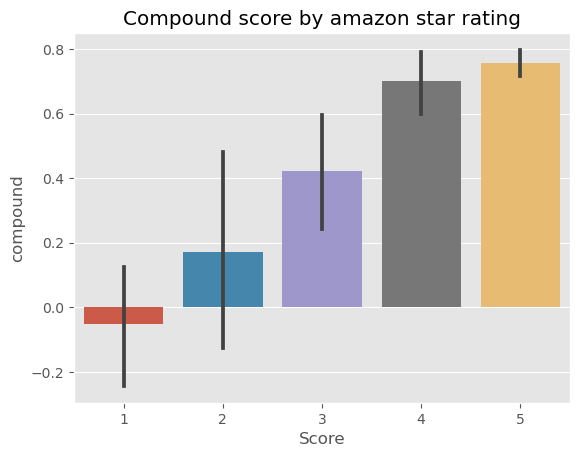

In [16]:
bar2 = sns.barplot(data = vaders, x = 'Score', y = 'compound')
bar2.set_title('Compound score by amazon star rating')

This is an expected behaviour only. This looks nice and validates the reuslts that we got.

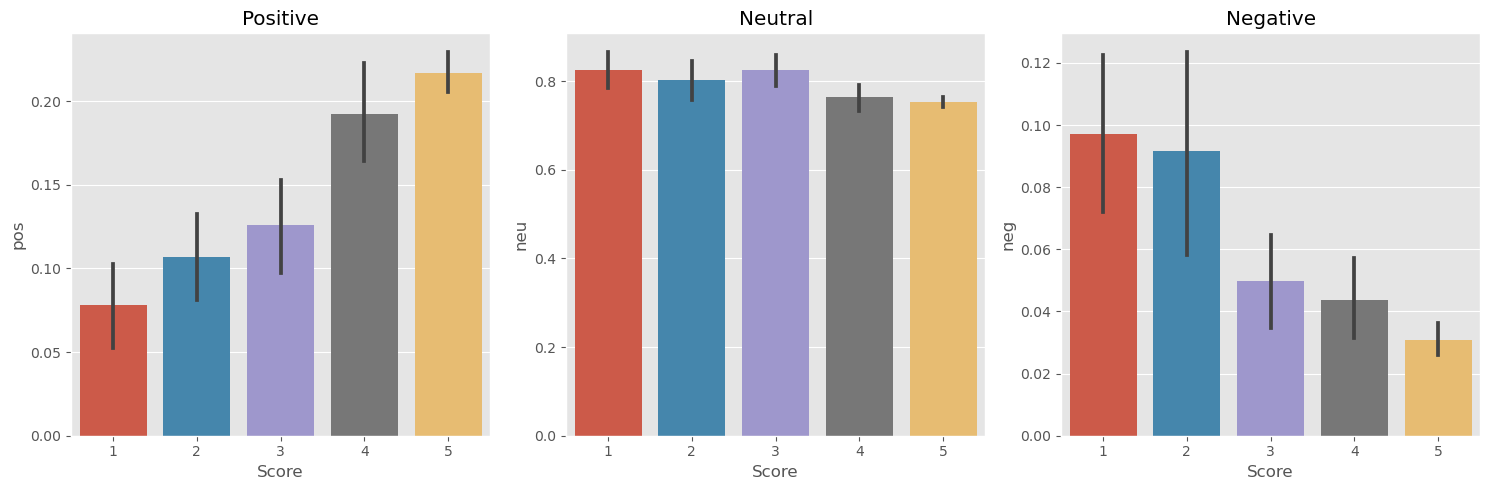

In [17]:
fig, axs = plt.subplots(1, 3, figsize = (15,5))
sns.barplot(data= vaders, x = 'Score', y = 'pos', ax = axs[0])
sns.barplot(data= vaders, x = 'Score', y = 'neu', ax = axs[1])
sns.barplot(data= vaders, x = 'Score', y = 'neg', ax = axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

# From hugging face,  a transformer based model (**Roberta Pretrained Model)** can be used, which can perform much better in capturing the sentimence, understanding the context, conneciton between the words etc.

In [18]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [19]:
# pulling the model weights down from the pretrained model
Model  = f'cardiffnlp/twitter-roberta-base-sentiment'
tokenizer = AutoTokenizer.from_pretrained(Model)
model = AutoModelForSequenceClassification.from_pretrained(Model)

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [20]:
print(example)

I can't say that i do like this


In [21]:
tokens = tokenizer(example)
sia.polarity_scores(example)

{'neg': 0.0, 'neu': 0.667, 'pos': 0.333, 'compound': 0.3612}

In [22]:
# on the roberta model
encoded = tokenizer(example, return_tensors = 'pt')  # creates the embeddings for the model

output = model(**encoded)

scores = output[0][0].detach().numpy()
scores = softmax(scores)
#print(scores)

scores_dict = {'neg': scores[0], 'neu': scores[1], 'pos': scores[2]}
print(scores_dict)

{'neg': 0.53504604, 'neu': 0.4202195, 'pos': 0.044734493}


In [23]:
def polarity_scores_roberta(example):
    encoded = tokenizer(example, return_tensors = 'pt')  # creates the embeddings for the model
    output = model(**encoded)

    scores = output[0][0].detach().numpy()
    scores = softmax(scores)

    scores_dict = {'roberta_neg': scores[0], 'roberta_neu': scores[1], 'roberta_pos': scores[2]}
    
    return scores_dict

# The roberta model predicted the sentiment of the sentence much better that it is more negative than neutral.

Now run the loop for the whole dataset

In [30]:
res = {}
for i, row in tqdm(df1.iterrows(), total = len(df1)):
    # skip the lines which are too long
    try:
        text = row['Text']
        myid = row['Id']
        vader_res = sia.polarity_scores(text)
        vader_res_rename= {}
        for key, value in vader_res.items():
            vader_res_rename[f'vader_{key}'] = value
        roberta_res = polarity_scores_roberta(text)
        both = {**vader_res, **roberta_res}

        res[myid] = both
    except RuntimeError:
        print(f'Brake for id:{myid}')

  0%|          | 0/400 [00:00<?, ?it/s]

Brake for id:83
Brake for id:187


In [31]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Id'})
results_df = results_df.merge(df1, how='left')

In [32]:
results_df.head()

,Id,neg,neu,pos,compound,roberta_neg,roberta_neu,roberta_pos,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,0.009624,0.049980,0.940395,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.079,0.853,0.068,-0.1027,0.508986,0.452413,0.038600,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,0.003229,0.098067,0.898704,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,0.002295,0.090219,0.907486,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,0.001635,0.010302,0.988063,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


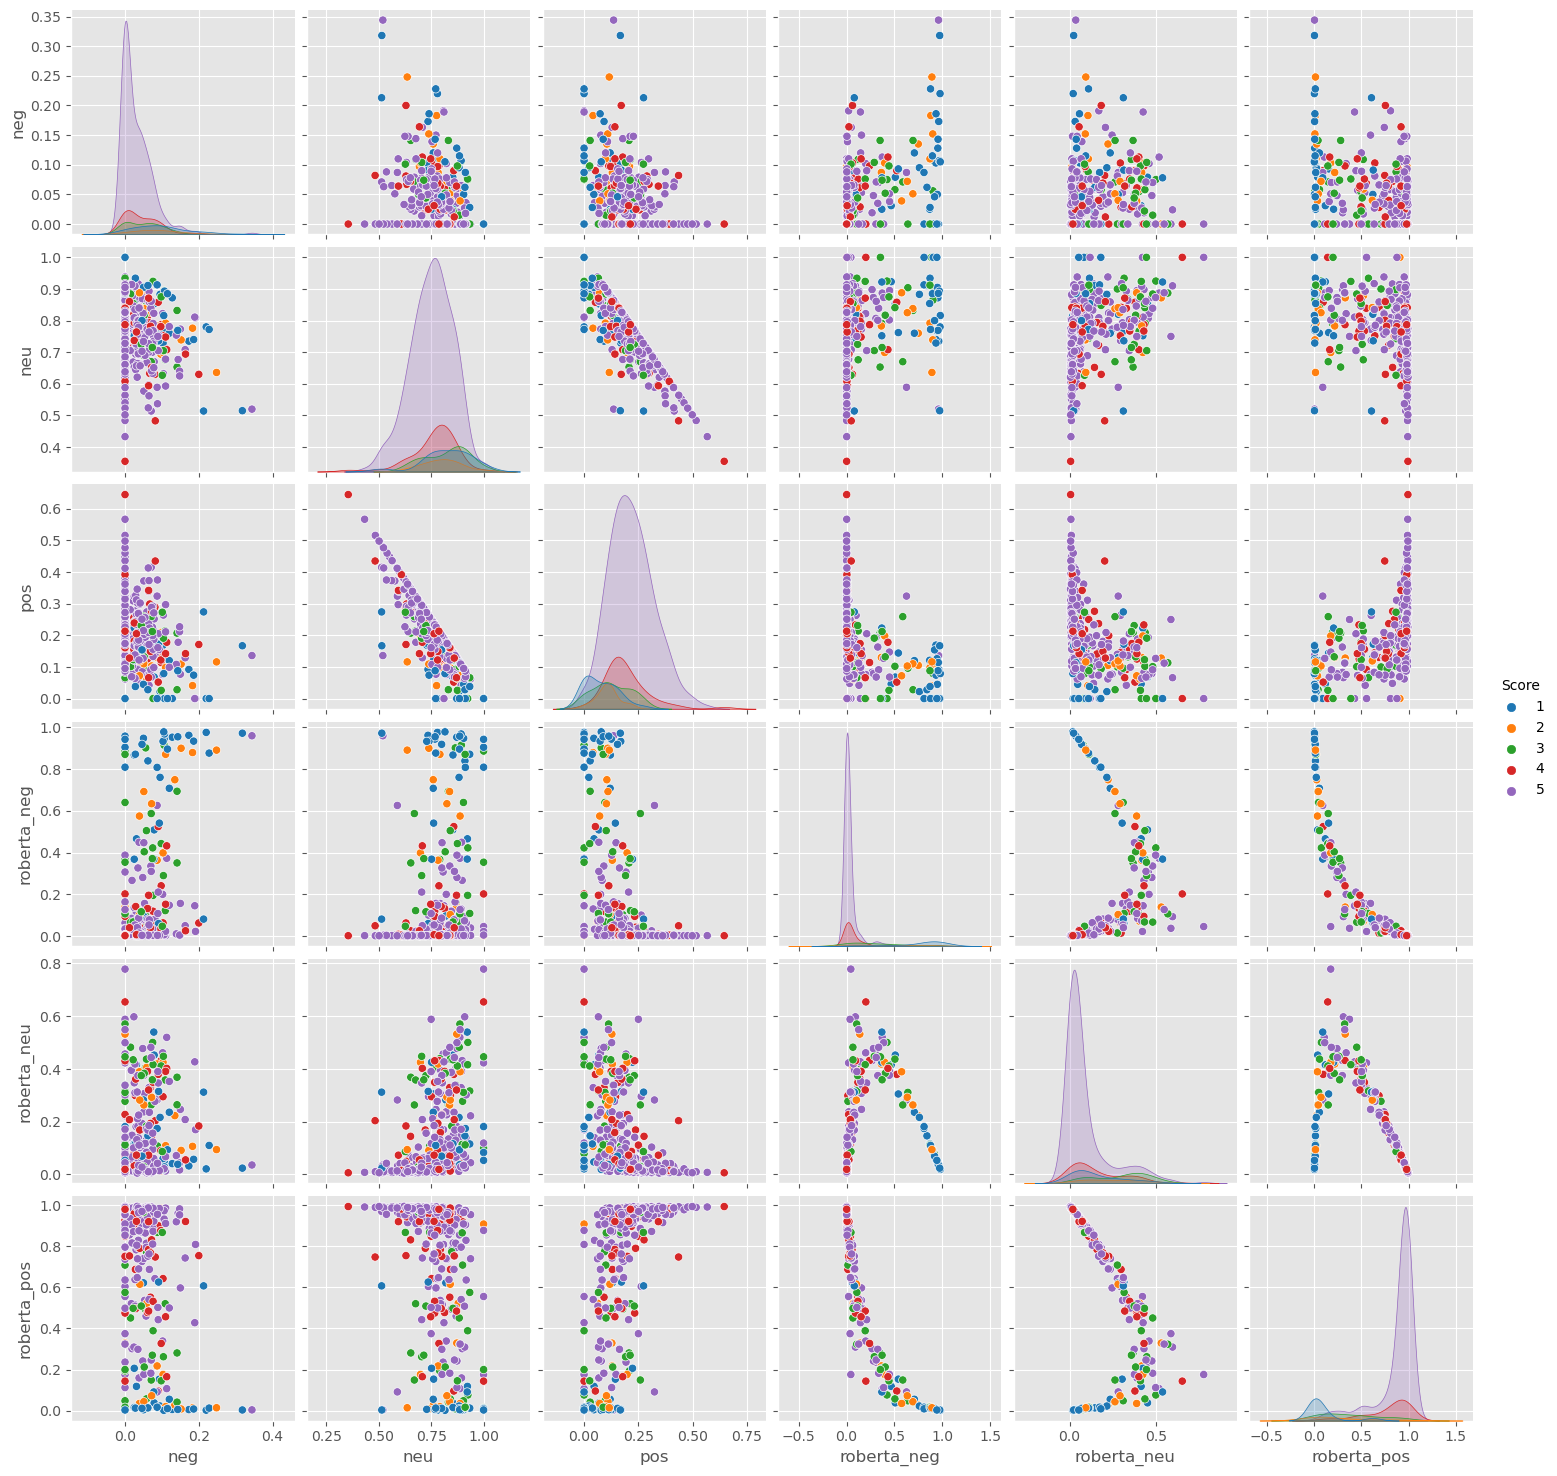

In [33]:
sns.pairplot(data=results_df,
             vars=['neg', 'neu', 'pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='Score',
            palette='tab10')
plt.show()